---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Assignment 4 - Hypothesis Testing
This assignment requires more individual learning than previous assignments - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

Definitions:
* A _quarter_ is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
* A _recession_ is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
* A _recession bottom_ is the quarter within a recession which had the lowest GDP.
* A _university town_ is a city which has a high percentage of university students compared to the total population of the city.

**Hypothesis**: University towns have their mean housing prices less effected by recessions. Run a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom. (`price_ratio=quarter_before_recession/recession_bottom`)

The following data files are available for this assignment:
* From the [Zillow research data site](http://www.zillow.com/research/data/) there is housing data for the United States. In particular the datafile for [all homes at a city level](http://files.zillowstatic.com/research/public/City/City_Zhvi_AllHomes.csv), ```City_Zhvi_AllHomes.csv```, has median home sale prices at a fine grained level.
* From the Wikipedia page on college towns is a list of [university towns in the United States](https://en.wikipedia.org/wiki/List_of_college_towns#College_towns_in_the_United_States) which has been copy and pasted into the file ```university_towns.txt```.
* From Bureau of Economic Analysis, US Department of Commerce, the [GDP over time](http://www.bea.gov/national/index.htm#gdp) of the United States in current dollars (use the chained value in 2009 dollars), in quarterly intervals, in the file ```gdplev.xls```. For this assignment, only look at GDP data from the first quarter of 2000 onward.

Each function in this assignment below is worth 10%, with the exception of ```run_ttest()```, which is worth 50%.

In [133]:
data = pd.read_csv('university_towns.txt', sep='\n', header=None)
data.head()

,0
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]


In [ ]:
State=[]
RegionName=[]
state_name=None
data = pd.read_csv('university_towns.txt', sep='\n', header=None)
for entry in data[0]:
    if '[edit]' in entry:
        state_name = entry[:entry.find('[')].strip()
    else:
        State.append(state_name)
        if entry.find('(') != -1:
            entry = entry[:entry.find('(')].strip()
        RegionName.append(entry)
pd.DataFrame({'State':State,'RegionName':RegionName},columns=['State','RegionName'])

In [3]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}

In [28]:
def get_list_of_university_towns():
    '''Returns a DataFrame of towns and the states they are in from the 
    university_towns.txt list. The format of the DataFrame should be:
    DataFrame( [ ["Michigan", "Ann Arbor"], ["Michigan", "Yipsilanti"] ], 
    columns=["State", "RegionName"]  )
    
    The following cleaning needs to be done:

    1. For "State", removing characters from "[" to the end.
    2. For "RegionName", when applicable, removing every character from " (" to the end.
    3. Depending on how you read the data, you may need to remove newline character '\n'. '''
    State=[]
    RegionName=[]
    state_name=None
    data = pd.read_csv('university_towns.txt', sep='\n', header=None)
    for entry in data[0]:
        if '[edit]' in entry:
            state_name = entry[:entry.find('[')].strip()
        else:
            State.append(state_name)
            if entry.find('(') != -1:
                entry = entry[:entry.find('(')].strip()
            RegionName.append(entry)
    pd.DataFrame({'State':State,'RegionName':RegionName},columns=['State','RegionName'])
    
    return pd.DataFrame({'State':State,'RegionName':RegionName},columns=['State','RegionName'])
get_list_of_university_towns()

,State,RegionName
0,Alabama,Auburn
1,Alabama,Florence
2,Alabama,Jacksonville
3,Alabama,Livingston
4,Alabama,Montevallo
5,Alabama,Troy
6,Alabama,Tuscaloosa
7,Alabama,Tuskegee
8,Alaska,Fairbanks
9,Arizona,Flagstaff


In [152]:
data = pd.read_excel('gdplev.xls')
data.head(10)

,"Current-Dollar and ""Real"" Gross Domestic Product",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,2016-09-29 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annual,NaN,NaN,NaN,Quarterly,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,(Seasonally adjusted annual rates),NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1929,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
8,1930,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
9,1931,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN


In [176]:
data = pd.read_excel('gdplev.xls',skiprows=8,header=None,\
                     names=['ayear','aGDPc','aGDP2009','na','year','GDPc','GDP2009','na2'])
data.head(10)

,ayear,aGDPc,aGDP2009,na,year,GDPc,GDP2009,na2
0,1929.0,104.6,1056.6,NaN,1947q1,243.1,1934.5,NaN
1,1930.0,92.2,966.7,NaN,1947q2,246.3,1932.3,NaN
2,1931.0,77.4,904.8,NaN,1947q3,250.1,1930.3,NaN
3,1932.0,59.5,788.2,NaN,1947q4,260.3,1960.7,NaN
4,1933.0,57.2,778.3,NaN,1948q1,266.2,1989.5,NaN
5,1934.0,66.8,862.2,NaN,1948q2,272.9,2021.9,NaN
6,1935.0,74.3,939.0,NaN,1948q3,279.5,2033.2,NaN
7,1936.0,84.9,1060.5,NaN,1948q4,280.7,2035.3,NaN
8,1937.0,93.0,1114.6,NaN,1949q1,275.4,2007.5,NaN
9,1938.0,87.4,1077.7,NaN,1949q2,271.7,2000.8,NaN


In [177]:
data = pd.DataFrame(data,columns=['year','GDPc','GDP2009'])
data.set_index('year',inplace=True)
data.head(10)

,GDPc,GDP2009
year,,
1947q1,243.1,1934.5
1947q2,246.3,1932.3
1947q3,250.1,1930.3
1947q4,260.3,1960.7
1948q1,266.2,1989.5
1948q2,272.9,2021.9
1948q3,279.5,2033.2
1948q4,280.7,2035.3
1949q1,275.4,2007.5


ERROR:root:Line magic function `%maplotlib` not found.


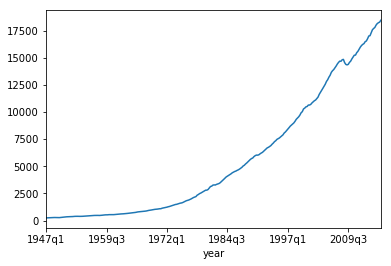

In [178]:
import matplotlib.pyplot as plt
%maplotlib inline
data['GDPc'].plot()
plt.show()

In [179]:
data.ix[data.index.str.contains('2000')]

,GDPc,GDP2009
year,,
2000q1,10031.0,12359.1
2000q2,10278.3,12592.5
2000q3,10357.4,12607.7
2000q4,10472.3,12679.3


In [182]:
data = data.ix['2000q1':]

In [183]:
data

,GDPc,GDP2009
year,,
2000q1,10031.0,12359.1
2000q2,10278.3,12592.5
2000q3,10357.4,12607.7
2000q4,10472.3,12679.3
2001q1,10508.1,12643.3
2001q2,10638.4,12710.3
2001q3,10639.5,12670.1
2001q4,10701.3,12705.3
2002q1,10834.4,12822.3


In [23]:
def get_recession_start():
    '''Returns the year and quarter of the recession start time as a 
    string value in a format such as 2005q3'''
    data = pd.read_excel('gdplev.xls',skiprows=8,header=None,names=['year1','GDPc1','GDP20091',\
                                                                    'na','year2','GDPc2','GDP20092','na2'])
    data = pd.DataFrame(data,columns=['year2','GDPc2','GDP20092'])
    data.set_index('year2',inplace=True)
    data = data.ix['2000q1':]
    change = [0]
    ans = None
    for i in range(1,data.shape[0]):
        if data['GDP20092'].values[i] - data['GDP20092'].values[i-1]>0:
            change.append(1)
        else:
            change.append(-1)
    for i in range(1,data.shape[0]-1):
        if change[i]==-1 and change[i+1]==-1:
            ans= data.index[i]
            break
    return ans
get_recession_start()

'2008q3'

- A quarter is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December.
- A recession is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth.
- A recession bottom is the quarter within a recession which had the lowest GDP.
- A university town is a city which has a high percentage of university students compared to the total population of the city.

In [25]:
def get_recession_end():
    '''Returns the year and quarter of the recession end time as a 
    string value in a format such as 2005q3'''
    data = pd.read_excel('gdplev.xls',skiprows=8,header=None,names=['year1','GDPc1','GDP20091',\
                                                                    'na','year2','GDPc2','GDP20092','na2'])
    data = pd.DataFrame(data,columns=['year2','GDPc2','GDP20092'])
    data.set_index('year2',inplace=True)
    data = data.ix['2000q1':]
    change = [0]
    ans = None
    for i in range(1,data.shape[0]):
        if data['GDP20092'].values[i] - data['GDP20092'].values[i-1]>0:
            change.append(1)
        else:
            change.append(-1)
    for i in range(1,data.shape[0]-1):
        if change[i]==-1 and change[i+1]==-1:
            for j in range(i,data.shape[0]-1):
                if change[j]==1 and change[j+1]==1:
                    ans = data.index[j+1]
                    return ans
    
get_recession_end()

'2009q4'

In [204]:
data = pd.read_excel('gdplev.xls',skiprows=8,header=None,names=['year1','GDPc1','GDP20091',\
                                                                    'na','year2','GDPc2','GDP20092','na2'])
data = pd.DataFrame(data,columns=['year2','GDPc2','GDP20092'])
data.set_index('year2',inplace=True)
data = data.ix['2000q1':]

recession_start = data.ix[get_recession_start()]
recession_end = data.ix[get_recession_end()]

recession_start, recession_end

#data['GDP20092'][recession_start:recession_end].argmin()

(GDPc2       14843.0
 GDP20092    14891.6
 Name: 2008q3, dtype: float64, GDPc2       14566.5
 GDP20092    14541.9
 Name: 2009q4, dtype: float64)

In [209]:
data.loc['2008q3':'2009q4']['GDP20092'].argmin()

'2009q2'

In [26]:
def get_recession_bottom():
    data = pd.read_excel('gdplev.xls',skiprows=8,header=None,names=['year1','GDPc1','GDP20091',\
                                                                    'na','year2','GDPc2','GDP20092','na2'])
    data = pd.DataFrame(data,columns=['year2','GDPc2','GDP20092'])
    data.set_index('year2',inplace=True)
    data = data.ix['2000q1':]
    return data.loc[get_recession_start():get_recession_end()]['GDP20092'].argmin()
get_recession_bottom()

'2009q2'

In [16]:
df = pd.read_csv('City_Zhvi_AllHomes.csv')
df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [216]:
df.columns

Index(['RegionID', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05',
       '1996-06', '1996-07', '1996-08', '1996-09',
       ...
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08'],
      dtype='object', length=249)

In [15]:
years = []
for i in ['2000-','2001-','2002-','2003-','2004-','2005-','2006-','2007-','2008-','2009-','2010-','2011-','2012-','2013-','2014-','2015-']:
    for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        years.append(i+j)
for i in ['01','02','03','04','05','06','07','08']:
    years.append('2016-'+i)

In [17]:
final_df = pd.DataFrame(df, columns=years)
final_df.head()

,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,204400.0,207000.0,209800.0,212300.0,214500.0,216600.0,219000.0,221100.0,222800.0,224300.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,136800.0,138300.0,140100.0,141900.0,143700.0,145300.0,146700.0,147900.0,149000.0,150400.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,52700.0,53100.0,53200.0,53400.0,53700.0,53800.0,53800.0,54100.0,54500.0,54700.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,111000.0,111700.0,112800.0,113700.0,114300.0,115100.0,115600.0,115900.0,116500.0,117200.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


In [18]:
another_df = pd.DataFrame(df, columns = ["State","RegionName"])
dic = dict(zip(years,years))
quarter = set()
for key in dic.keys():
    if key.endswith('01') or key.endswith('02') or key.endswith('03'):
        dic[key]=key[0:4]+'q1'
    elif key.endswith('04') or key.endswith('05') or key.endswith('06'):
        dic[key]=key[0:4]+'q2'
    elif key.endswith('07') or key.endswith('08')or key.endswith('09'):
        dic[key]=key[0:4]+'q3'
    else:
        dic[key]=key[0:4]+'q4'
    quarter.add(dic[key])
final_df.rename(columns=dic,inplace=True)
grouped = final_df.groupby(final_df.columns, axis=1).mean()
final_df = pd.merge(another_df,grouped,how='inner',left_index=True,right_index=True)

In [19]:
final_df['State']=final_df['State'].apply(lambda x :states[x])
final_df.set_index(["State","RegionName"], inplace=True)
len(final_df)

10730

In [20]:
len(final_df.columns)

67

In [21]:
def convert_housing_data_to_quarters():
    '''Converts the housing data to quarters and returns it as mean 
    values in a dataframe. This dataframe should be a dataframe with
    columns for 2000q1 through 2016q3, and should have a multi-index
    in the shape of ["State","RegionName"].
    
    Note: Quarters are defined in the assignment description, they are
    not arbitrary three month periods.
    
    The resulting dataframe should have 67 columns, and 10,730 rows.
    '''
    df = pd.read_csv('City_Zhvi_AllHomes.csv')
    years = []
    for i in ['2000-','2001-','2002-','2003-','2004-','2005-','2006-','2007-','2008-','2009-','2010-','2011-','2012-','2013-','2014-','2015-']:
        for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
            years.append(i+j)
    for i in ['01','02','03','04','05','06','07','08']:
        years.append('2016-'+i)
    
    final_df = pd.DataFrame(df, columns=years)
    
    another_df = pd.DataFrame(df, columns = ["State","RegionName"])
    
    dic = dict(zip(years,years))

    for key in dic.keys():
        if key.endswith('01') or key.endswith('02') or key.endswith('03'):
            dic[key]=key[0:4]+'q1'
        elif key.endswith('04') or key.endswith('05') or key.endswith('06'):
            dic[key]=key[0:4]+'q2'
        elif key.endswith('07') or key.endswith('08')or key.endswith('09'):
            dic[key]=key[0:4]+'q3'
        else:
            dic[key]=key[0:4]+'q4'
            
    final_df.rename(columns=dic,inplace=True)
    grouped = final_df.groupby(final_df.columns, axis=1).mean()
    final_df = pd.merge(another_df,grouped,how='inner',left_index=True,right_index=True)
    final_df['State']=final_df['State'].apply(lambda x :states[x])
    final_df.set_index(["State","RegionName"], inplace=True)
    return final_df

convert_housing_data_to_quarters()

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
New York,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.154667e+05,5.228000e+05,5.280667e+05,5.322667e+05,5.408000e+05,5.572000e+05,5.728333e+05,5.828667e+05,5.916333e+05,587200.0
California,Los Angeles,2.070667e+05,2.144667e+05,2.209667e+05,2.261667e+05,2.330000e+05,2.391000e+05,2.450667e+05,2.530333e+05,2.619667e+05,2.727000e+05,...,4.980333e+05,5.090667e+05,5.188667e+05,5.288000e+05,5.381667e+05,5.472667e+05,5.577333e+05,5.660333e+05,5.774667e+05,584050.0
Illinois,Chicago,1.384000e+05,1.436333e+05,1.478667e+05,1.521333e+05,1.569333e+05,1.618000e+05,1.664000e+05,1.704333e+05,1.755000e+05,1.775667e+05,...,1.926333e+05,1.957667e+05,2.012667e+05,2.010667e+05,2.060333e+05,2.083000e+05,2.079000e+05,2.060667e+05,2.082000e+05,212000.0
Pennsylvania,Philadelphia,5.300000e+04,5.363333e+04,5.413333e+04,5.470000e+04,5.533333e+04,5.553333e+04,5.626667e+04,5.753333e+04,5.913333e+04,6.073333e+04,...,1.137333e+05,1.153000e+05,1.156667e+05,1.162000e+05,1.179667e+05,1.212333e+05,1.222000e+05,1.234333e+05,1.269333e+05,128700.0
Arizona,Phoenix,1.118333e+05,1.143667e+05,1.160000e+05,1.174000e+05,1.196000e+05,1.215667e+05,1.227000e+05,1.243000e+05,1.265333e+05,1.283667e+05,...,1.642667e+05,1.653667e+05,1.685000e+05,1.715333e+05,1.741667e+05,1.790667e+05,1.838333e+05,1.879000e+05,1.914333e+05,195200.0
Nevada,Las Vegas,1.326000e+05,1.343667e+05,1.354000e+05,1.370000e+05,1.395333e+05,1.417333e+05,1.433667e+05,1.461333e+05,1.493333e+05,1.509333e+05,...,1.700667e+05,1.734000e+05,1.754667e+05,1.775000e+05,1.816000e+05,1.867667e+05,1.906333e+05,1.946000e+05,1.972000e+05,199950.0
California,San Diego,2.229000e+05,2.343667e+05,2.454333e+05,2.560333e+05,2.672000e+05,2.762667e+05,2.845000e+05,2.919333e+05,3.012333e+05,3.128667e+05,...,4.802000e+05,4.890333e+05,4.964333e+05,5.033667e+05,5.120667e+05,5.197667e+05,5.254667e+05,5.293333e+05,5.362333e+05,539750.0
Texas,Dallas,8.446667e+04,8.386667e+04,8.486667e+04,8.783333e+04,8.973333e+04,8.930000e+04,8.906667e+04,9.090000e+04,9.256667e+04,9.380000e+04,...,1.066333e+05,1.089000e+05,1.115333e+05,1.137000e+05,1.211333e+05,1.285667e+05,1.346000e+05,1.405000e+05,1.446000e+05,149300.0
California,San Jose,3.742667e+05,4.065667e+05,4.318667e+05,4.555000e+05,4.706667e+05,4.702000e+05,4.568000e+05,4.455667e+05,4.414333e+05,4.577667e+05,...,6.794000e+05,6.970333e+05,7.149333e+05,7.314333e+05,7.567333e+05,7.764000e+05,7.891333e+05,8.036000e+05,8.189333e+05,822200.0


In [33]:
rec_start = get_recession_start()
rec_bottom = get_recession_bottom()
house_quarters = convert_housing_data_to_quarters()
university_towns = get_list_of_university_towns()
university_towns.set_index(['State','RegionName'],inplace=True)

In [36]:
univ_town_ec = pd.merge(house_quarters,university_towns,how='inner',left_index=True,right_index=True)

In [41]:
univ_town_ec = univ_town_ec.dropna()

In [37]:
non_univ_town = house_quarters.drop(university_towns.index)

In [38]:
non_univ_town = non_univ_town.dropna()

In [40]:
nut_start = non_univ_town[rec_start]
nut_bottom = non_univ_town[rec_bottom]

ut_start = univ_town_ec[rec_start]
ut_bottom = univ_town_ec[rec_bottom]

ut_price_ratio = ut_start.divide(ut_bottom)
nut_price_ratio = nut_start.divide(nut_bottom)
    
p = ttest_ind(ut_price_ratio, nut_price_ratio).pvalue

if ut_price_ratio.mean() > nut_price_ratio.mean():
    better = "non-university town"
else:
    better = "university town"

different = p<0.01
result  = (different, p, better)

,,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2014q2,2014q3,2014q4,2015q1,2015q2,2015q3,2015q4,2016q1,2016q2,2016q3
State,RegionName,,,,,,,,,,,,,,,,,,,,,
California,Los Angeles,207066.666667,214466.666667,220966.666667,226166.666667,233000.000000,239100.000000,245066.666667,253033.333333,261966.666667,272700.000000,...,498033.333333,509066.666667,518866.666667,528800.000000,538166.666667,547266.666667,557733.333333,566033.333333,577466.666667,584050.0
Illinois,Chicago,138400.000000,143633.333333,147866.666667,152133.333333,156933.333333,161800.000000,166400.000000,170433.333333,175500.000000,177566.666667,...,192633.333333,195766.666667,201266.666667,201066.666667,206033.333333,208300.000000,207900.000000,206066.666667,208200.000000,212000.0
Pennsylvania,Philadelphia,53000.000000,53633.333333,54133.333333,54700.000000,55333.333333,55533.333333,56266.666667,57533.333333,59133.333333,60733.333333,...,113733.333333,115300.000000,115666.666667,116200.000000,117966.666667,121233.333333,122200.000000,123433.333333,126933.333333,128700.0
Arizona,Phoenix,111833.333333,114366.666667,116000.000000,117400.000000,119600.000000,121566.666667,122700.000000,124300.000000,126533.333333,128366.666667,...,164266.666667,165366.666667,168500.000000,171533.333333,174166.666667,179066.666667,183833.333333,187900.000000,191433.333333,195200.0
California,San Jose,374266.666667,406566.666667,431866.666667,455500.000000,470666.666667,470200.000000,456800.000000,445566.666667,441433.333333,457766.666667,...,679400.000000,697033.333333,714933.333333,731433.333333,756733.333333,776400.000000,789133.333333,803600.000000,818933.333333,822200.0


In [45]:
def run_ttest():
    '''First creates new data showing the decline or growth of housing prices
    between the recession start and the recession bottom. Then runs a ttest
    comparing the university town values to the non-university towns values, 
    return whether the alternative hypothesis (that the two groups are the same)
    is true or not as well as the p-value of the confidence. 
    
    Return the tuple (different, p, better) where different=True if the t-test is
    True at a p<0.01 (we reject the null hypothesis), or different=False if 
    otherwise (we cannot reject the null hypothesis). The variable p should
    be equal to the exact p value returned from scipy.stats.ttest_ind(). The
    value for better should be either "university town" or "non-university town"
    depending on which has a lower mean price ratio (which is equivilent to a
    reduced market loss).'''
    
    # Get recession start and end quarters
    rec_start = '2008q2' # From the forums, Coursera >_<
    rec_bottom = get_recession_bottom()
    
    # Get the data containing the mean GDP 
    house_quarters = convert_housing_data_to_quarters()
    
    # Get the univ towns and set its indices
    university_towns = get_list_of_university_towns()
    university_towns.set_index(['State','RegionName'],inplace=True)
    
    # Join univ town and GDP data, discard the univ towns and drop the nulls
    univ_town_ec = pd.merge(house_quarters,university_towns,how='inner',left_index=True,right_index=True)
    non_univ_town = house_quarters.drop(university_towns.index)
    univ_town_ec = univ_town_ec.dropna()
    non_univ_town = non_univ_town.dropna()
    
    # Get the recession start and bottom indices for univ towns
    ut_start = univ_town_ec[rec_start]
    ut_bottom = univ_town_ec[rec_bottom]

    # Get the recession start and bottom indices for non-univ towns
    nut_start = non_univ_town[rec_start]
    nut_bottom = non_univ_town[rec_bottom]
    
    # Get the price ratios
    ut_price_ratio = ut_start.divide(ut_bottom)
    nut_price_ratio = nut_start.divide(nut_bottom)
    
    # Run the ttest
    p = ttest_ind(ut_price_ratio, nut_price_ratio).pvalue

    # Apply the given filters
    if ut_price_ratio.mean() > nut_price_ratio.mean():
        better = "non-university town"
    else:
        better = "university town"

    different = p<0.01
    result  = (different, p, better)
    
    # Boom and done!
    return result
run_ttest()

(True, 0.0051648663279200407, 'university town')